In [105]:
import tensorflow.compat.v2 as tf
import matplotlib.pyplot as plt
import numpy as np

In [106]:
# reconstruct the model identically.
# my_model = tf.keras.models.load_model("my_model_v2")
my_model = tf.keras.models.load_model("my_model_v2.h5")

In [115]:
img_raw = tf.io.read_file("imgs/8_002.jpg")
image = tf.image.decode_jpeg(img_raw)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [28, 28])

print(image.dtype)
print(image.shape)
print(image.shape[2])


<dtype: 'float32'>
(28, 28, 3)
3


it is rgb, need transfer
float32
(1, 28, 28, 1)


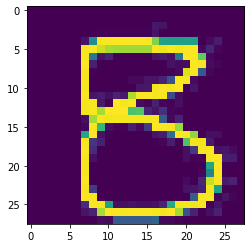

In [116]:
if image.shape[2] == 3:
    print('it is rgb, need transfer')    
    gray_img = tf.image.rgb_to_grayscale(image)

#     bw_img = 1.0 - gray_img
    plt.imshow(gray_img[...,0])

    bw_img_arr = tf.expand_dims(gray_img, 0)

elif image.shape[2] == 1:
    print('it is grayscale, does not need transfer')
    plt.imshow(image[...,0])
    
    bw_img_arr = tf.expand_dims(image, 0)


    
print(bw_img_arr.numpy().dtype)
print(bw_img_arr.numpy().shape)

In [117]:
output_data = my_model.predict(bw_img_arr)
np.argmax(output_data)

8

float32
(28, 28, 1)
<dtype: 'float32'>
(1, 28, 28, 1)


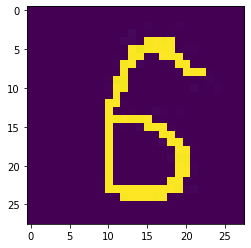

In [110]:

from tensorflow.keras.preprocessing.image import img_to_array, load_img
from matplotlib import pyplot as plt

image = load_img("imgs/6_003.jpg", color_mode="grayscale", target_size=(28,28))


plt.imshow(image)



image_array = img_to_array(image)
print(image_array.dtype)
print(image_array.shape)

image_array = tf.expand_dims(image_array, 0)

print(image_array.dtype)
print(image_array.shape)

In [111]:
import numpy as np
output_data = my_model.predict(image_array)
np.argmax(output_data[0])


5

In [104]:
preds = my_model.predict_classes(image_array)
print(preds)

[5]


In [ ]:
print(output_data)